En esta ocasion analizaremos el Iris flower dataset.
El cual consiste de 50 ejemplares de las diferentes variedades de Iris; Setosa, Virginica y Vesicolor

En este conjunto de datos existen 4 caracteristicas principales asociadas a cada una de las variedades, estas son, ancho y largo de los sepalos y los petalos.

In [94]:
from sklearn import datasets
iris = datasets.load_iris()

In [95]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle
import matplotlib.pylab as plt
import numpy as np

In [96]:
X = iris["data"]
Y = iris["target"]
names_features = iris["feature_names"]
names_target = iris["feature_names"]
df = pd.DataFrame(X, columns=names_features)

columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols= [col.replace(")" ,"") for col in columns_name ]

df.columns=cols
df["Target"]=Y
df

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [97]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for trainIndex, testIndex in split.split(df, df["Target"]):
    stratTrainSet = df.loc[trainIndex]
    stratTestSet = df.loc[testIndex]

dfTrain = stratTrainSet
dfTest = stratTestSet

# Tarea 8.1

¿Entrenar con más caracteristicas y con base a las probabilidades y dado un input  definir a  que clase pertenece: 'versicolor', 'virginica' ?

----
Tomamos todas las 4 caracteristicas mencionadas al principio para entrenar cada una de las variedades de Iris

### Setosa

In [98]:
yTrainSetosa = (dfTrain['Target'] == 0).astype(float)
xTrainSetosa = dfTrain.iloc[:, 0:4].values

yTestSetosa = (dfTest['Target'] == 0).astype(float)
xTestSetosa = dfTest.iloc[:, 0:4].values

logReg = LogisticRegression()
logReg.fit(xTrainSetosa, yTrainSetosa)

print('Puntaje, datos entrenamiento: ', logReg.score(xTrainSetosa, yTrainSetosa))
print('Puntaje, datos de test: ', logReg.score(xTestSetosa, yTestSetosa))

Puntaje, datos entrenamiento:  1.0
Puntaje, datos de test:  1.0


 ### Versicolor

In [99]:
yTrainVersicolor = (dfTrain['Target'] == 1).astype(float)
xTrainVersicolor = dfTrain.iloc[:, 0:4].values

yTestVersicolor = (dfTest['Target'] == 1).astype(float)
xTestVersicolor = dfTest.iloc[:, 0:4].values

logReg = LogisticRegression()
logReg.fit(xTrainVersicolor, yTrainVersicolor)

print('Puntaje, datos entrenamiento: ', logReg.score(xTrainVersicolor, yTrainVersicolor))
print('Puntaje, datos de test: ', logReg.score(xTestVersicolor, yTestVersicolor))

Puntaje, datos entrenamiento:  0.725
Puntaje, datos de test:  0.7


### Virginica

In [100]:
yTrainVirginica = (dfTrain['Target'] == 2).astype(float)
xTrainVirginica = dfTrain.iloc[:, 0:4].values

yTestVirginica = (dfTest['Target'] == 2).astype(float)
xTestVirginica = dfTest.iloc[:, 0:4].values

logReg = LogisticRegression()
logReg.fit(xTrainVirginica, yTrainVirginica)

print('Puntaje, datos entrenamiento: ', logReg.score(xTrainVirginica, yTrainVirginica))
print('Puntaje, datos de test: ', logReg.score(xTestVirginica, yTestVirginica))

Puntaje, datos entrenamiento:  0.975
Puntaje, datos de test:  0.9666666666666667


Dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?

In [101]:
# Entrenamiento sin especificar tipo de Iris
yTrain = dfTrain['Target'].values
xTrain = dfTrain.iloc[:, 0:4].values

xTest = [[4.9, 5.0, 1.8, 0.3]]

logReg = LogisticRegression()
logReg.fit(xTrain, yTrain)

prob = logReg.predict_proba(xTest)
names = {'Setosa', 'Versicolor', 'Virginica'}

for i, name in enumerate(names):
    print(f'{name}: {prob[0][i]}')

Versicolor: 0.992147316419129
Setosa: 0.007852621852771007
Virginica: 6.172809992437849e-08


De esta forma podemos notar como la flor anteriormente analizada tiene una mayor probabilidad de ser **Setosa**

## Tarea 8.2

1. Entrenar el modelo anterior para un numero mayor de caracteristicas

Podemos hacer uso de la softmax regresion, tomando todas las caracteristicas que tenemos disponibles en el database, de la siguiente forma:

In [102]:
yTrain = dfTrain['Target']
xTrain = dfTrain.iloc[:, 0:4].values

yTest = dfTest['Target']
xTest = dfTest.iloc[:, 0:4].values

softmaxReg = LogisticRegression(solver="lbfgs", C=10, random_state=42, max_iter=1000)
softmaxReg.fit(xTrain, yTrain)

LogisticRegression(C=10, max_iter=1000, random_state=42)

In [103]:
print('Puntaje, datos entrenamiento, softmax: ', softmaxReg.score(xTrain , yTrain))
print('Puntaje, datos de test:', softmaxReg.score(xTest , yTest))

Puntaje, datos entrenamiento, softmax:  0.975
Puntaje, datos de test: 1.0


2. Analizar que pasa con la regularización.

La regularizacion se refiere a la forma en la que se aumenta la generalizabilidad de un modelo, evitando el overfitting.

Leyendo la documentacion de sklearn podemos notar que existen 2 tipos de regularizacion, *L1* la cual consiste en calcular la suma de los valores absolutos de los parametros y *L2* que calcula la raiz de la suma de los cuadrados de los parametros.

Los solucionadores *newton-cg*, *sag*, and *lbfgs* soportan uicamente la regularizacion *L2*, por lo que vamos a analizar el comportamiento del metodo LogisticRegression con y sin esta regularizacion


In [104]:
NoregSofmax = LogisticRegression(solver="lbfgs", random_state=42, penalty=None) #quitamos la regularizacion
NoregSofmax.fit(xTrain, yTrain)

LogisticRegression(penalty=None, random_state=42)

In [105]:
print('Puntaje, datos entrenamiento, softmax: ', NoregSofmax.score(xTrain , yTrain))
print('Puntaje, datos de test:', NoregSofmax.score(xTest , yTest))

Puntaje, datos entrenamiento, softmax:  0.9833333333333333
Puntaje, datos de test: 1.0


In [106]:
yTrain = dfTrain['Target'].values
xTrain = dfTrain.iloc[:, 0:4].values

xTest = [[4.9, 5.0, 1.8, 0.3]]

prob = NoregSofmax.predict_proba(xTest)
names = {'Setosa', 'Versicolor', 'Virginica'}

for i, name in enumerate(names):
    print(f'{name}: {prob[0][i]}')


Versicolor: 1.0
Setosa: 9.144208389845218e-31
Virginica: 4.840133330499552e-57


Notemos que al remover la regularizacion el modelo el modelo redujo la probabilidad de que el caso especifico fuse virginica y versicolor mientras que aumento la probabilidad de ser Setosa, en comparacion con el modelo regularizado.

3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos

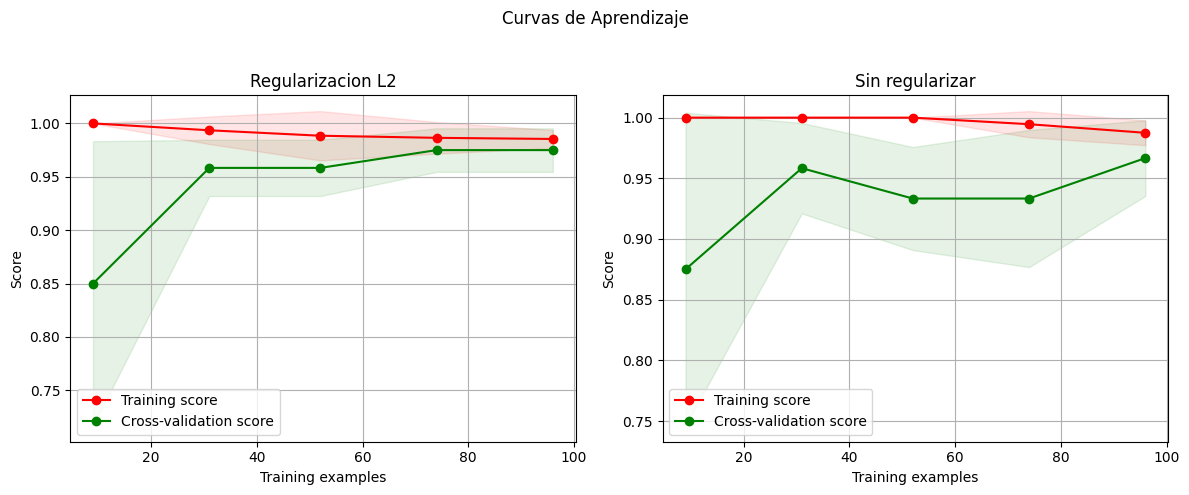

In [107]:
def learningCurves(x, y, cv, nJobs=1, trainSizes=np.linspace(0.1, 1.0, 5)):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle("Curvas de Aprendizaje", fontsize=12)

    estimadores = [
        LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42),  # Regularizado
        LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty=None, random_state=42)  # Sin regularización
    ]
    tittle = ["Regularizacion L2", "Sin regularizar"]

    for idx, (estimador, titulo) in enumerate(zip(estimadores, tittle)):
        trainSizes, trainScores, testScores = learning_curve(estimador, x, y, cv=cv, n_jobs=nJobs, train_sizes=trainSizes)

        trainScoresMean = np.mean(trainScores, axis=1)
        trainScoresStd = np.std(trainScores, axis=1)
        testScoresMean = np.mean(testScores, axis=1)
        testScoresStd = np.std(testScores, axis=1)

        ax = axes[idx]
        ax.set_title(titulo)
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Score")
        ax.grid()

        ax.fill_between(trainSizes, trainScoresMean - trainScoresStd, trainScoresMean + trainScoresStd, alpha=0.1, color="r")
        ax.fill_between(trainSizes, testScoresMean - testScoresStd, testScoresMean + testScoresStd, alpha=0.1, color="g")

        ax.plot(trainSizes, trainScoresMean, 'o-', color="r", label="Training score")
        ax.plot(trainSizes, testScoresMean, 'o-', color="g", label="Cross-validation score")
        ax.legend(loc="best")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

yTrain = dfTrain['Target']
xTrain = dfTrain.iloc[:, 0:4].values

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
learningCurves(xTrain, yTrain, cv, nJobs=4)

Notemos que en ambos casos, cuando se tienen pocos valores de entrenamiento, el puntaje que arroja es muy bajo, por otro lado, mientras que para el caso regularizado de la softmax regresion este puntaje aumenta conforme aumentan los datos, notemos que para el caso sin regularizar este puntaje disminuye con la mitad de los valores de prueba.


4. Con base en el libro [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb), constrnuir las fronteras de desición para este multiclasificador.

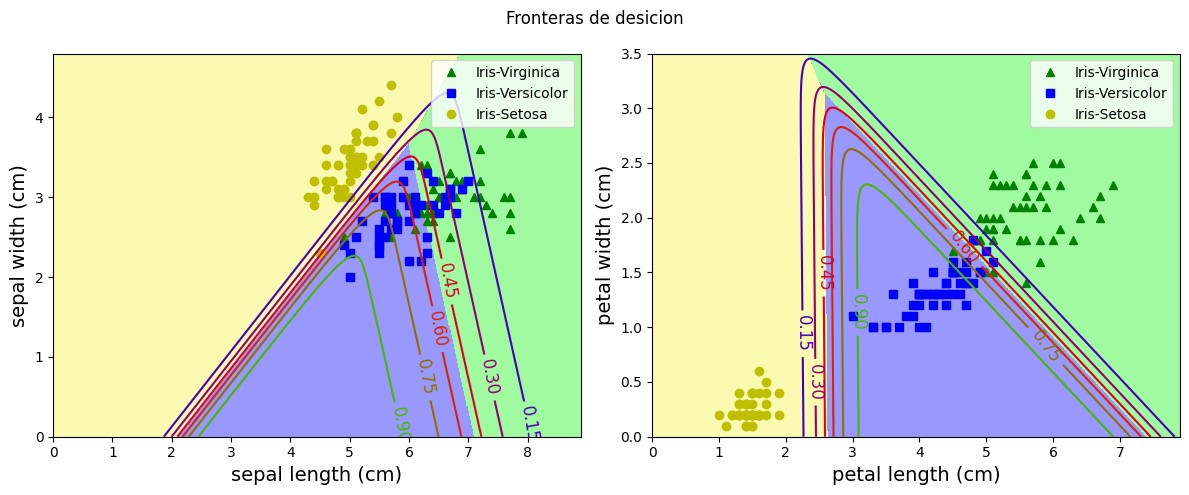

In [108]:
from matplotlib.colors import ListedColormap

caracteristicas = [
    ("sepal length (cm)", "sepal width (cm)", 0, 1),  # Sepal Length vs Sepal Width
    ("petal length (cm)", "petal width (cm)", 2, 3)    # Petal Length vs Petal Width
]

customCmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Fronteras de desicion", fontsize=12)

for i, (xlabel, ylabel, idx0, idx1) in enumerate(caracteristicas):

    X = iris["data"][:, (idx0, idx1)]
    y = iris["target"]

    softmaxReg = LogisticRegression(solver="lbfgs", C=10, random_state=42)
    softmaxReg.fit(X, y)

    x0, x1 = np.meshgrid(
        np.linspace(0, X[y == 2, 0].max() + 1, 500).reshape(-1, 1),
        np.linspace(0, X[y == 2, 1].max() + 1, 500).reshape(-1, 1),
    )
    XNew = np.c_[x0.ravel(), x1.ravel()]

    yProba = softmaxReg.predict_proba(XNew)
    yPredict = softmaxReg.predict(XNew)

    zz1 = yProba[:, 1].reshape(x0.shape)
    zz = yPredict.reshape(x0.shape)

    axs[i].plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris-Virginica")
    axs[i].plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris-Versicolor")
    axs[i].plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris-Setosa")
    axs[i].contourf(x0, x1, zz, cmap=customCmap)
    contour = axs[i].contour(x0, x1, zz1, cmap=plt.cm.brg)
    axs[i].clabel(contour, inline=1, fontsize=12)
    axs[i].set_xlabel(xlabel, fontsize=14)
    axs[i].set_ylabel(ylabel, fontsize=14)
    axs[i].legend()

plt.tight_layout()
plt.show()
